In [ ]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")
df.head()

fatal: destination path 'DATA602Datasets' already exists and is not an empty directory.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


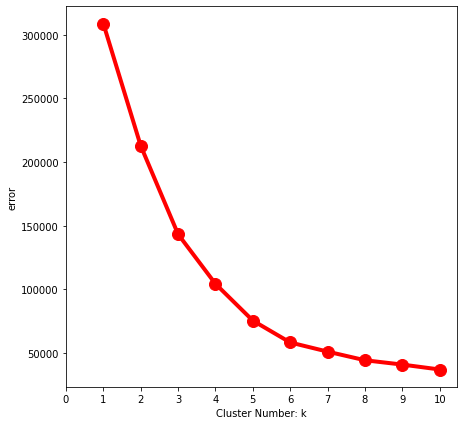

In [ ]:

# input matrix for segmentation
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values


WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Cluster Number: k")
plt.ylabel("error")
plt.show()

In [ ]:
#Optimum k value is 5 because after 5 there are no significant decreases.

In [ ]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

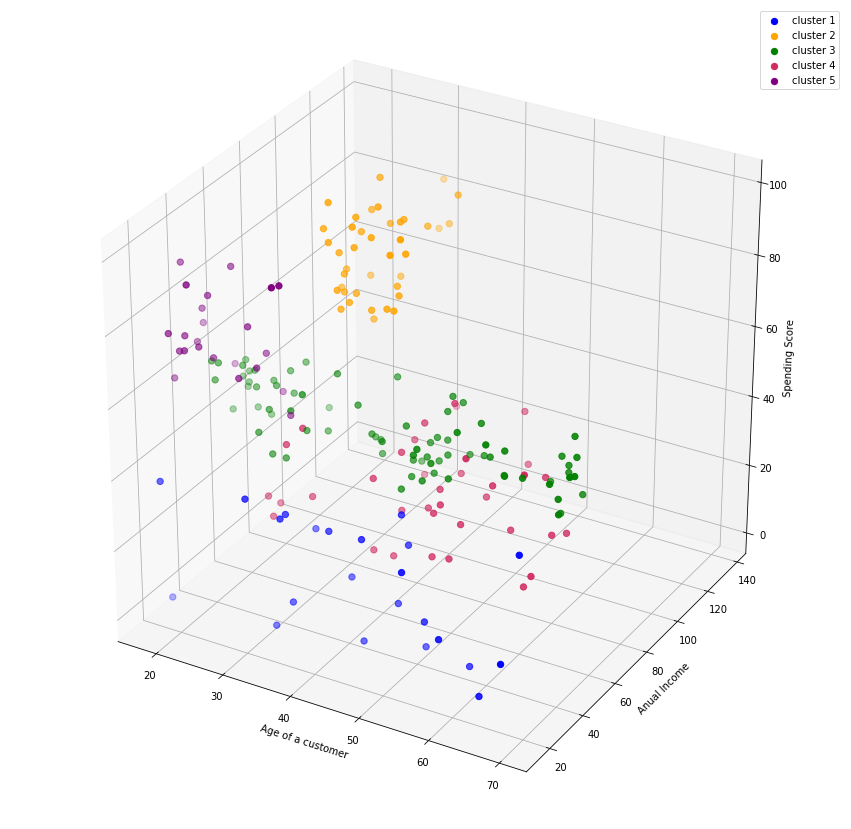

In [ ]:
# 3d scatterplot 

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 4")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 5")
ax.set_xlabel('Age of a customer')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

In [ ]:
#It looks separated and nice but maybe 6 can be good too but there is a mix clusters red and green. If we choose k as 6 it may not be optimal

In [ ]:
#We should k value according to decrease in the error.If we choose high k values we increase the complexity for nothing.